In [1]:
import numpy as np

In [2]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]  #소프트맥스 수치. 총합이 1.0 어느정도 분포확률.  예전에 아구맥스를 썻으면 0.6이 나왔을 것이다?
    #아래가 레이블?
true = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [3]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t) ** 2) #15페이지 수식

정답(t)와 예측값(y)의 오차를 MSE로 계산

In [4]:
mean_squared_error(np.array(y), np.array(true)) #실제로 몇번째가 참이라 했는가.

0.09750000000000003

In [5]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] #7번째가 맞다고 함. 소프트맥스에서.  실제 넣으면 MSE가 높다. 이수치가 낮을 수록 에러율이 낮으니까 정답에 가깝다.
mean_squared_error(np.array(y), np.array(true))

0.5975

첫번째 실험의 MSE값이 더 작으므로 더 정답에 가깝다고 판단 가능

#### 교차 엔트로피 오차 CEE

In [6]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y+ delta))

정답(t)와 예측값(y)의 오차를 CEE로 계산

In [7]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
true = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [8]:
cross_entropy_error(np.array(y), np.array(true))

0.510825457099338

In [9]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(true))

2.302584092994546

1에 가까울 수록 에러율이 적다

### 미니배치 학습


In [10]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import pickle
from dataset.mnist import load_mnist
import matplotlib.pylab as plt

In [11]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize= True, one_hot_label=True) 
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [12]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [13]:
ran=np.random.choice(60000, 10)
print(ran.size)

10


In [14]:
def cross_entropy_error_one_hot(y, t): #여러개의 데이터 처리를 위함
    if y.ndim == 1:
        t = t.reshape(1, t.size) #정답레이블
        y = y.reshape(1, y.size) #신경망 출력
        
    batch_size = y.shape[0]
    print(t.size)
    print(y.size)
    print(batch_size)
    return -np.sum(t * np.log(y))
#     return -np.sum(t * np.log(y)) / batch_size


In [15]:
def cross_entropy_error_label(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size 

In [16]:
print(x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
print(t_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [18]:
print(x_batch)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [19]:
print(t_batch)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [20]:
#cross_entropy_error_one_hot(y_pred_batch, t_batch) #예측치가 들어가야함.

In [21]:
y = np.array([5])
print(y)
y.shape[0]

[5]


1

In [22]:
#cross_entropy_error_label(np.array([5]), x_train )

### 미분

In [23]:
def numerical_differential(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [24]:
def function_1(x) :
    return 0.01*x**2 + 0.1*x

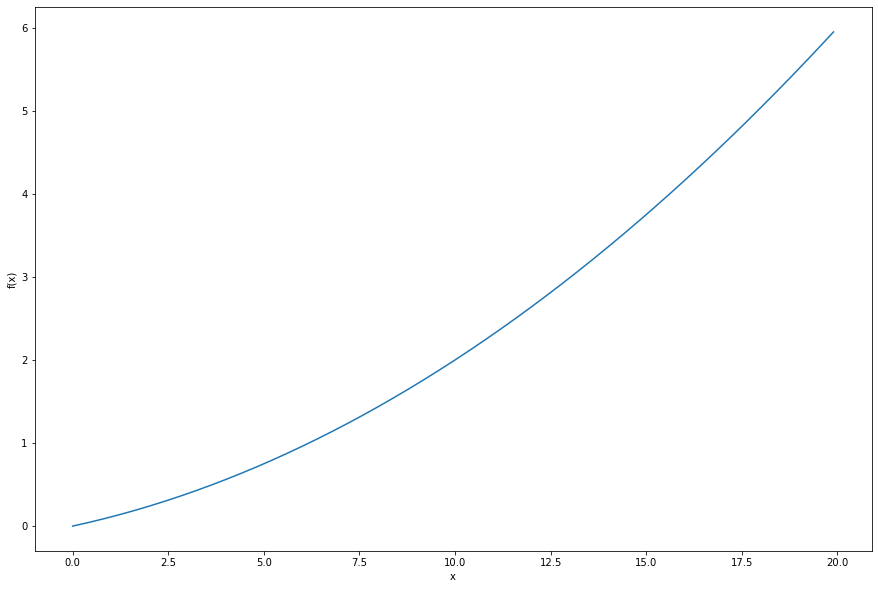

In [25]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.figure(figsize = (15, 10))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [26]:
numerical_differential(function_1, 5)

0.1999999999990898

In [27]:
numerical_differential(function_1,10)

0.2999999999986347

In [28]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for index in range(x.size):
        tmp_val = x[index]
        x[index] = tmp_val + h
        fxh1 = f(x)
        
        x[index] = tmp_val - h
        fxh2 = f(x)
        
        grad[index] = (fxh1 - fxh2) / (2*h)
        x[index] = tmp_val
        
    return grad

In [29]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [30]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [31]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [32]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

In [33]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [34]:
numerical_differential(function_tmp1, 3.0)

6.00000000000378

In [35]:
def funciton_tmp2(x1):
    return 3.0**2.0 + x1*x1

In [36]:
numerical_differential(funciton_tmp2, 4.0)

7.999999999999119

In [37]:
def gradient_descent(f, init_x, lr=0.01, step_num = 100):
    x = init_x
    x_history = []
    
    for i in range(step_num):
        x_history.append(x.copy())
        grad = numerical_gradient(f, x)
        x -= lr * grad
    
    return x, np.array(x_history)
        

In [38]:
init_x = np.array([-3.0, 4.0])
lr = 0.1
step_num = 100
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)
print(x)

[-6.11110793e-10  8.14814391e-10]


In [39]:
import sys, os
import numpy as np


In [40]:
def softmax(matrix):  #소프트맥스 구현 함수
    maximum_of_matrix = np.max(matrix)
    difference_from_maximum = matrix - maximum_of_matrix
    exponential_of_difference = np.exp(difference_from_maximum)
    sum_of_exponential = np.sum(exponential_of_difference)
    y = exponential_of_difference / sum_of_exponential
    return y

def cross_entropy_error(y, t):   #크로스엔트로피에러. 수식넣어놓은것
    delta = 1e-7
    return -np.sum(t * np.log(y+ delta))

def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags = ['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val
        it.iternext()
        
    return grad

In [41]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):   #로스계산하는 단계
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [42]:
net = simpleNet()   #실제 테스트를 해보자.
print(net.W)

[[-0.8868341   0.03501017 -1.73550686]
 [-0.3802029  -1.37427066  0.99365898]]


In [43]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-0.87428307 -1.21583749 -0.14701103]


In [44]:
np.argmax(p)

2

In [45]:
t = np.array([0, 0, 1]) # 참값이 001  3번째가 가장 트루값. 틀렸네.(랜덤임) 이롤 때의 로스값을 구한것.
net.loss(x, t)

0.6024762244991341

In [46]:
def f(W):
    return net.loss(x,t)

In [47]:
dW = numerical_gradient(f, net.W) #함수자체의 특성때문에 f로 됨? 리턴의 값이 들어감.
print(dW) #우리가 원했던 크로스엔트로피에러를 가르키는것. 하나하나 기울기가 나온것. dw

[[ 0.15872625  0.11280116 -0.27152741]
 [ 0.23808938  0.16920174 -0.40729111]]


In [48]:
f = lambda w: net.loss(x,t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.15872625  0.11280116 -0.27152741]
 [ 0.23808938  0.16920174 -0.40729111]]


## 학습알고리즘 구현하기

### 2층 신경망 클래스 구현하기

In [77]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import pickle
from dataset.mnist import load_mnist
import matplotlib.pylab as plt

In [78]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def relu(x):
    return np.maximum(0, x)
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

def relu_grad(x):
    grad = np.zeros(x)
    grad[x>=0] = 1
    return grad
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T
    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    if t.size == y.size:
        t = t.argmax(axis = 1)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t]+ 1e-7)) / batch_size
def softmax_loss(X, t):
    y = softmax(X)
    return cross_entropy_error(y, t)
def numerical_gradient(f,x):   #인덱스 수만큼 기울기 계산?
    h = 1e-4
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags = ['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val
        it.iternext()
        
    return grad

In [79]:
class TwoLayerNet:
    
    # 신경망의 초기에서 입력 크기, 은닉 크기, 출력 크기, std의 가중치 초기를 구함
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        # 가중치를 정규분포를 따르는 난수로 초기화
        self.params['W1'] = weight_init_std * \
                            np.random.randn(input_size, hidden_size)  #100개 에서 가중치를 정해서 50을 가르키게? 화살표
        self.params['W2'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size) #50개 에서 가중치를 정해서 10을 가르키게? 화살표
        # 편향은 일단 0으로 초기화
        self.params['b1'] = np.zeros(hidden_size)
        self.params['b2'] = np.zeros(output_size)
        
    # 신경망을 거쳐 예측하는 함수, 분류 문제의 결과로 softmax된 값을 반환함
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']  #
        b1, b2 = self.params['b1'], self.params['b2']  #편향은 0
        
        a1 = np.dot(x, W1) + b1  #입력에 웨이트와 편향 적용    1*100  dot 100* 50
        z1 = sigmoid(a1)   #시그모이드로 적용 0~1.0
        a2 = np.dot(z1, W2) + b2  #2층 웨이트와 편형 적용     50*10 dot 10*1
        y = softmax(a2)   # 소프트맥스 맥스값에서 뺀값? 작은 값 작아지고 큰값 커짐
        
        return y #1*10?
    
    # 손실함수 값 구하는 함수
    def loss(self, x, t):
        y = self.predict(x) # 신경망 거쳐온 결과 값
        return cross_entropy_error(y, t) # 손실함수의 값을 구함 -> 미분 필요
    
    # 정확도 구하는 함수
    def accuracy(self, x, t):
        y = self.predict(x) # 신경망 다 거쳐서 softmax화 된 값
        
        y = np.argmax(y, axis=1) # 예측 정답 인덱스
        t = np.argmax(t, axis=1) # 실제 정답 인덱스
        
        accuracy = np.sum(y == t) / float(x.shape[0]) # 맞는 정답의 개수 / 전체 문제의 개수
        return accuracy
    
    # 기울기 구하는 함수
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t) # 가중치를 받아서 loss를 구하는 함수의 결과
        
        # 손실함수에 대해 기울기(각 가중치의 편미분 벡터)를 구함
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1']) #위에 정의한 함수
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        # 기울기 반환
        return grads
    
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [80]:
net = TwoLayerNet(input_size=784, hidden_size = 50, output_size=10)   #인풋사이즈, 은닉사이즈, 아웃풋크기를 정해서 2중신경망객체 생성

In [81]:
print(net.params["W1"].shape)     #웨이트 크기 설정: 84 => 50  
print(net.params["W2"].shape)     #웨이트 크기 설정:50 => 10
print(net.params["b1"].shape)     #가중치 크기 50  
print(net.params["b2"].shape)     #가중치 크기 10


(784, 50)
(50, 10)
(50,)
(10,)


In [82]:
x = np.random.rand(100, 784) #랜덤하게 100개 1~784
y = net.predict(x) #프레딕으로 가자.

In [83]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)
#수행시간 오래 걸림
grads = net.numerical_gradient(x, t) 

In [84]:
print(grads["W1"])   #각각의 기울기를 다 구함?
print(grads["W1"].shape)
print(grads["b1"].shape)
print(grads["W2"].shape)
print(grads["b2"].shape)

[[-3.20137339e-05  1.66961800e-04  2.73072409e-05 ...  1.96264054e-04
  -2.40246356e-04  7.72433317e-05]
 [ 1.05387064e-04  1.67365166e-04 -7.69220931e-05 ...  1.13939760e-04
  -3.06953167e-04  2.14561691e-04]
 [ 8.47477710e-05  7.80088127e-05 -9.61097468e-05 ...  1.00665913e-04
  -2.22251157e-04  1.79667965e-04]
 ...
 [-4.09287715e-06  1.23839983e-05  1.19568209e-04 ...  1.60124347e-04
  -9.22283006e-05 -1.11008276e-04]
 [ 3.59255359e-05  1.26859527e-04  5.47386469e-05 ...  9.56608170e-05
  -1.18726013e-04 -3.23420468e-05]
 [-9.49184886e-05  1.72834433e-04 -3.64682040e-05 ...  1.15210772e-04
  -7.84396570e-05 -2.07206163e-05]]
(784, 50)
(50,)
(50, 10)
(10,)


In [85]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [86]:
train_loss_list = []

In [90]:
iters_num = 10000  #만 개
print(iters_num)
train_size = x_train.shape[0]
print(train_size)
batch_size = 100 #미니 배치 크기 100
learning_rate = 0.1 #학습률 설정
iter_per_epoch = max(train_size / batch_size, 1) #몇뭉탱이인지
print(iter_per_epoch) #6만개인데 배치크기가 100이라 600뭉치.

10000
60000
600.0


In [88]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)  

In [73]:
for i in range(iters_num):
    #미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size) # 원소 갯수를 배치크기만큼 뽑기? 인덱스번호.[123,146,7,88568,]
    x_batch = x_train[batch_mask] #트레인에서 인덱스를 찾아서 배치 생성.(배치사이즈만큼이지.)
    t_batch = t_train[batch_mask]
    
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # 성능 개선판   #네트워크 기울기를 구함?
    
    #배개 변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    #학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # Loss출력
    if i % iter_per_epoch == 0: #배치마다 로스 출력
        print("loss: " + str(loss))

loss: 2.2836920411613097
loss: 0.8068638758793584
loss: 0.4179168186734332
loss: 0.5255057587197242
loss: 0.23208386716164028
loss: 0.35454440339445986
loss: 0.31034862678490943
loss: 0.37689957052138695
loss: 0.19451982982639365
loss: 0.29664708996785044
loss: 0.20589251616978976
loss: 0.17177378751422243
loss: 0.08939972859175827
loss: 0.1487496473447051
loss: 0.27386272881287127
loss: 0.29300622755780137
loss: 0.10433912825795205


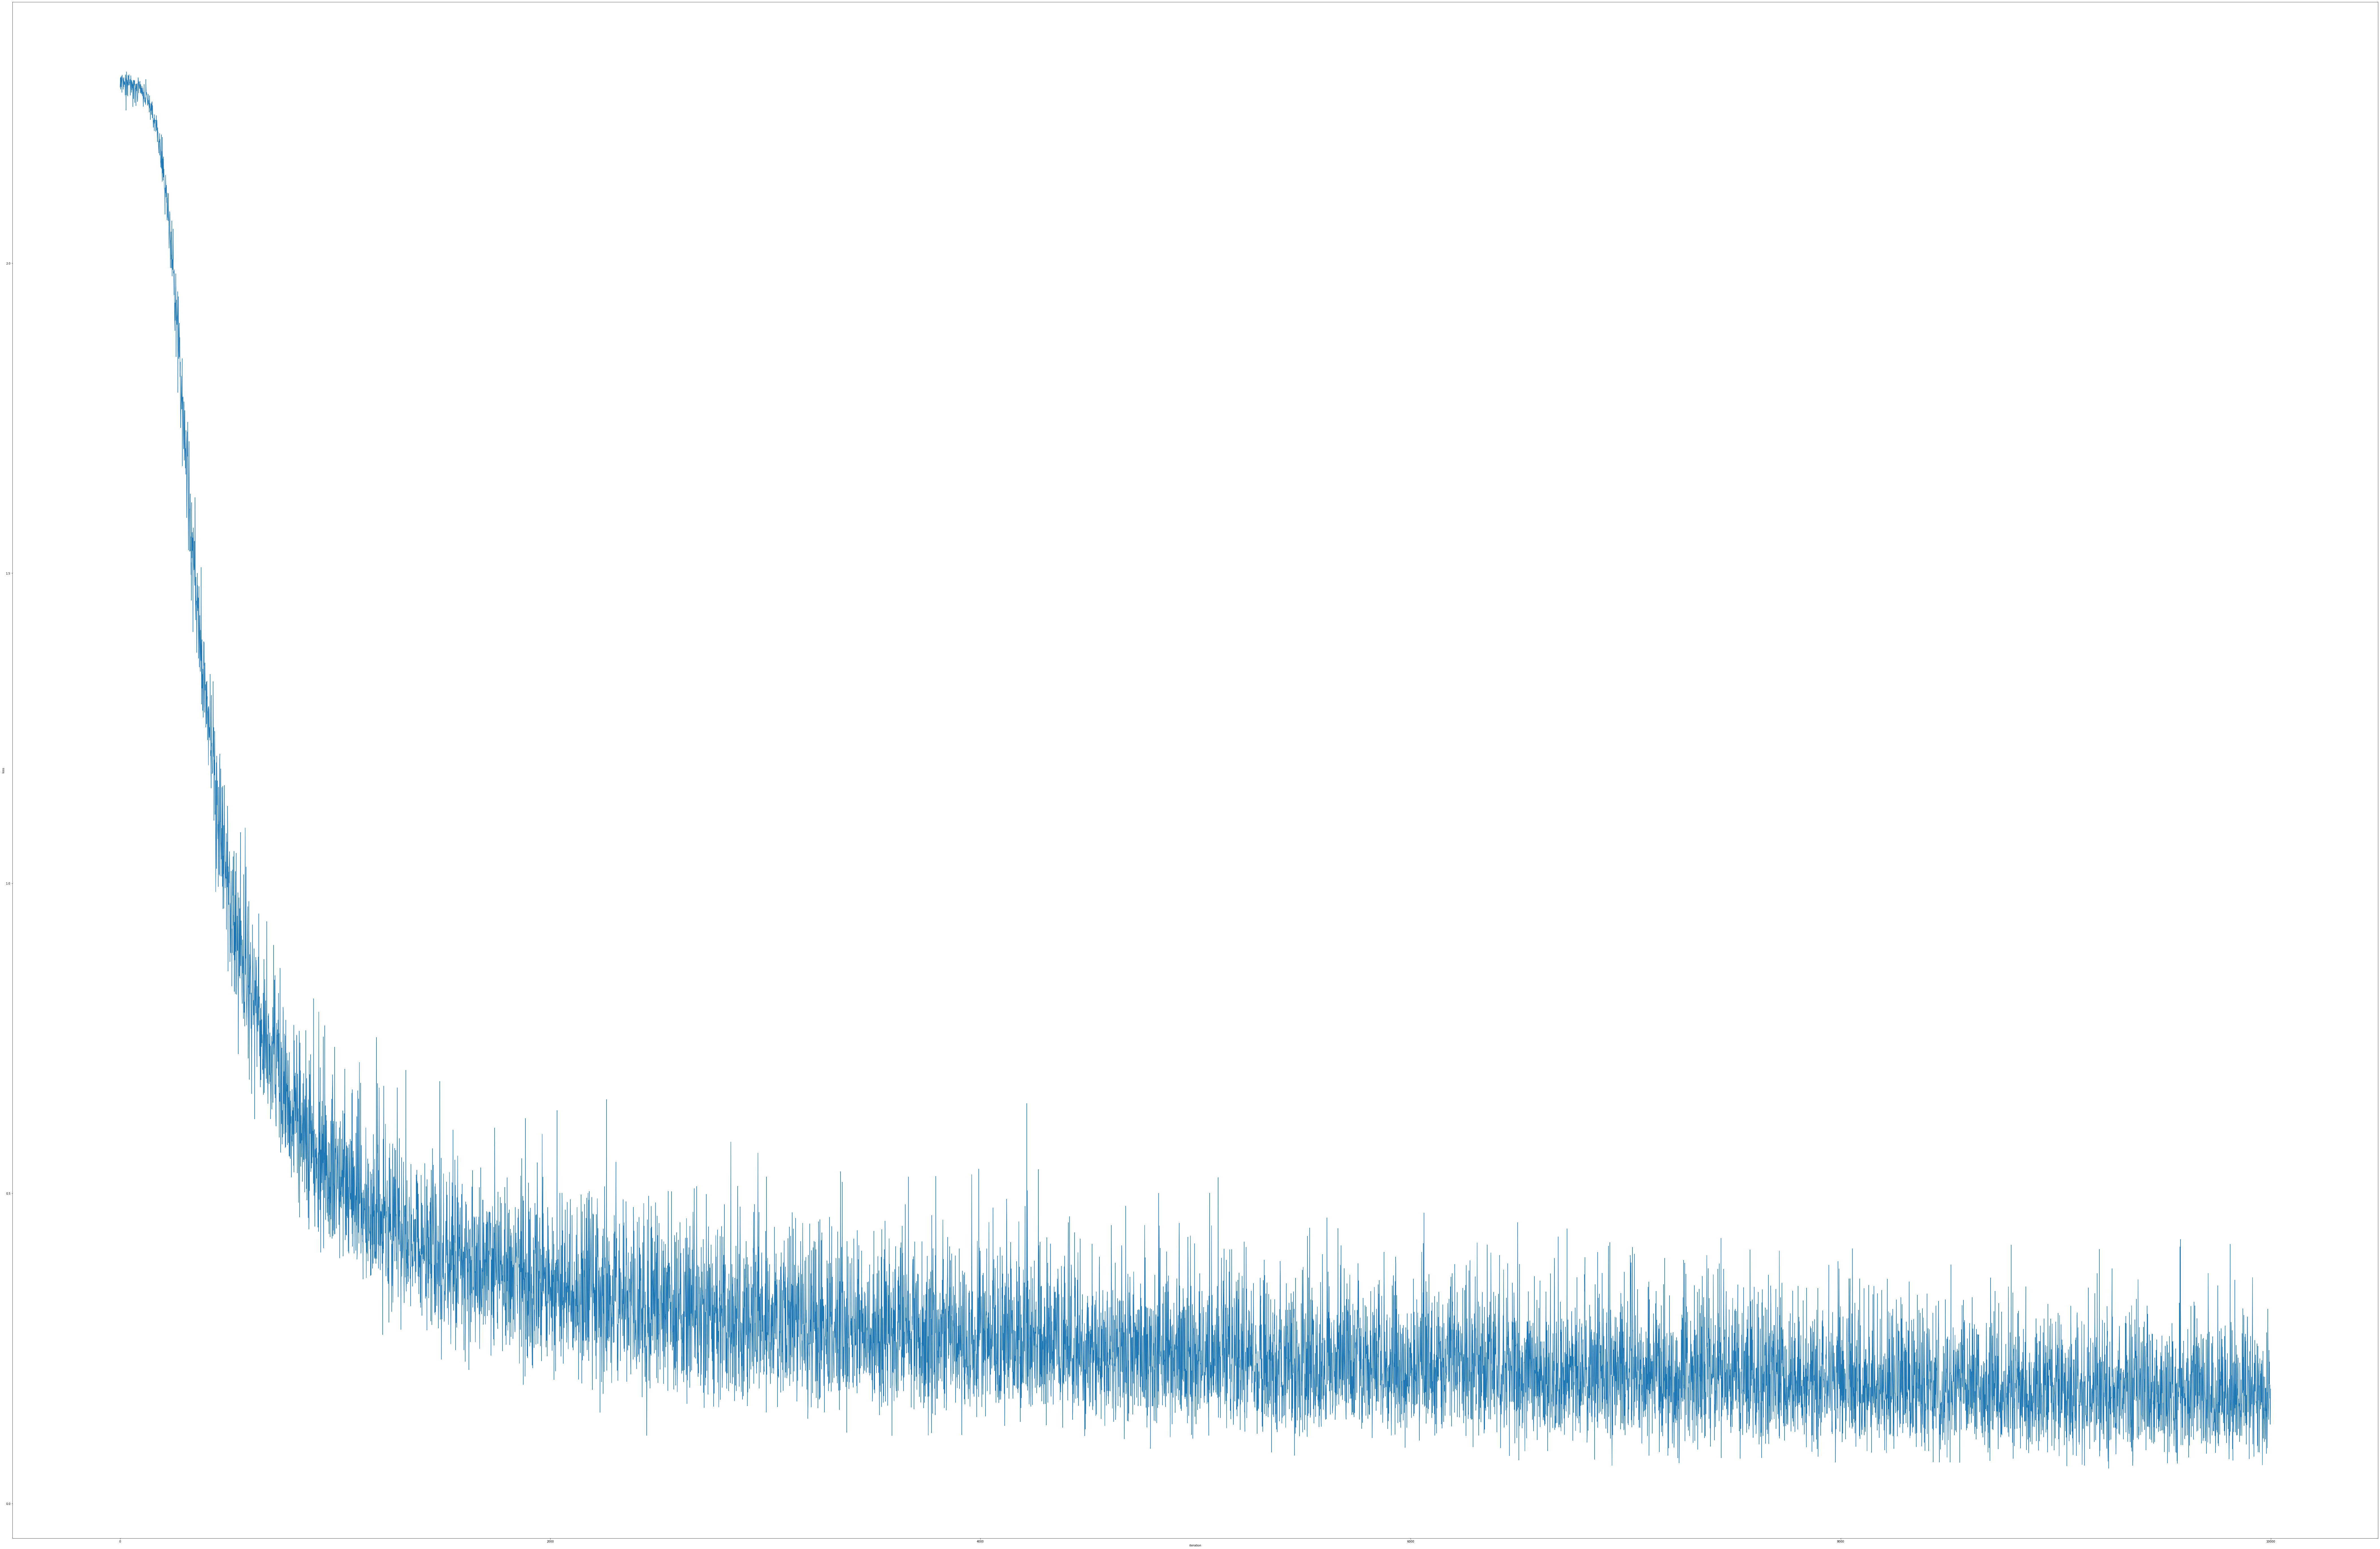

In [74]:
x= np.arange(len(train_loss_list))

plt.figure(figsize = (150, 100))
plt.plot(x, train_loss_list, label= 'train acc')
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()


In [63]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [64]:
train_loss_list = []
train_acc_list = []
test_acc_list = []


In [65]:
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
iter_per_epoch = max(train_size / batch_size, 1)

In [66]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [67]:
for i in range(iters_num):
    #미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    #loss 및 accuracy 출력
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("loss: "+ str(loss)+ ", train acc: "+ str(train_acc)+ ", test acc: "+ str(test_acc))

loss: 2.3023036256134954, train acc: 0.0993, test acc: 0.1032
loss: 0.8845407635509095, train acc: 0.7878833333333334, test acc: 0.7889
loss: 0.4829481817480909, train acc: 0.8764833333333333, test acc: 0.8809
loss: 0.31981356624295665, train acc: 0.8984166666666666, test acc: 0.9004
loss: 0.3116796118056874, train acc: 0.90775, test acc: 0.9112
loss: 0.12768106479304492, train acc: 0.9142833333333333, test acc: 0.9194
loss: 0.1618887058217326, train acc: 0.92005, test acc: 0.9228
loss: 0.5447391888654116, train acc: 0.9236, test acc: 0.9253
loss: 0.18123537029915643, train acc: 0.9276666666666666, test acc: 0.9287
loss: 0.23182964009198215, train acc: 0.9307666666666666, test acc: 0.9325
loss: 0.14897468124304955, train acc: 0.9335666666666667, test acc: 0.9337
loss: 0.11074973566075343, train acc: 0.9371, test acc: 0.9372
loss: 0.12980879078864951, train acc: 0.9400666666666667, test acc: 0.9394
loss: 0.17089639373584753, train acc: 0.9424333333333333, test acc: 0.9419
loss: 0.137829

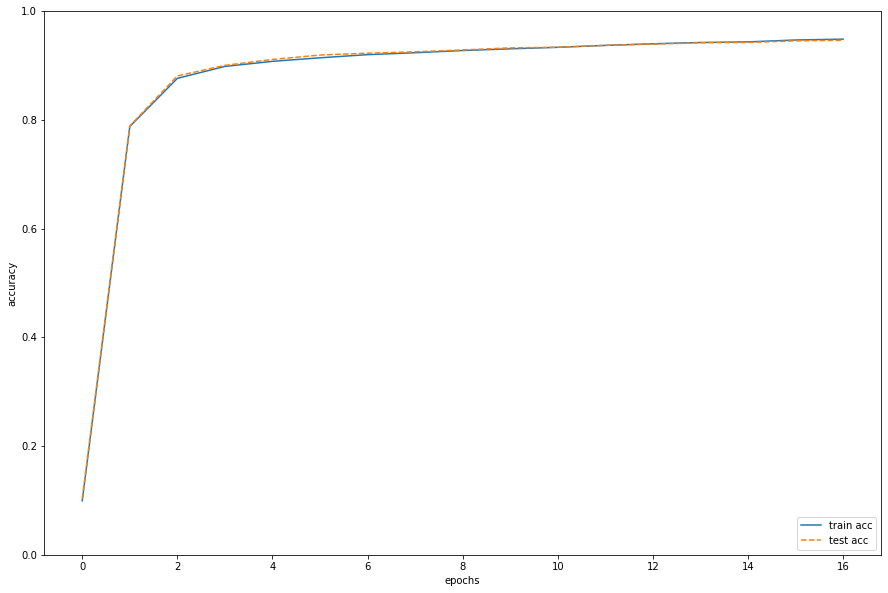

In [68]:
markers = {'train': 'o', 'test':'s'}
x = np.arange(len(train_acc_list))

plt.figure(figsize = (15, 10))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle= '--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc= 'lower right')
plt.show()